# Preprocessing audio data for Deep Learning

Reference video [here](https://www.youtube.com/watch?v=Oa_d-zaUti8&list=PL-wATfeyAMNrtbkCNsLcpoAyBBRJZVlnf&index=11)

We will first upload a single audio file of any nature to analyze here. 
We will name it `audio.wav`, `audio.mp3`, `audio.flac`, etc. depending on the codec.

Once that is done, we will load, analyze and transform it with the `librosa` python library.

## Time domain signal

In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import librosa
import librosa.display

In [2]:
audio_file = "audio.mp3"

# sr=sampling rate, in Hz / T=duration, in s / N=num samples --> N = sr * T
full_signal, sr = librosa.load(audio_file, sr=22050)

In [3]:
print(full_signal.shape)

(6528384,)


Let's limit the amount of samples to contain only 30s of audio. We will pick the audio to go from 2:00 to 2:30.

In [4]:
duration = 30
n_samples = int(sr * duration)
signal = full_signal[4*n_samples:5*n_samples]
print(signal.shape)

(661500,)


Now we will visualize the signal

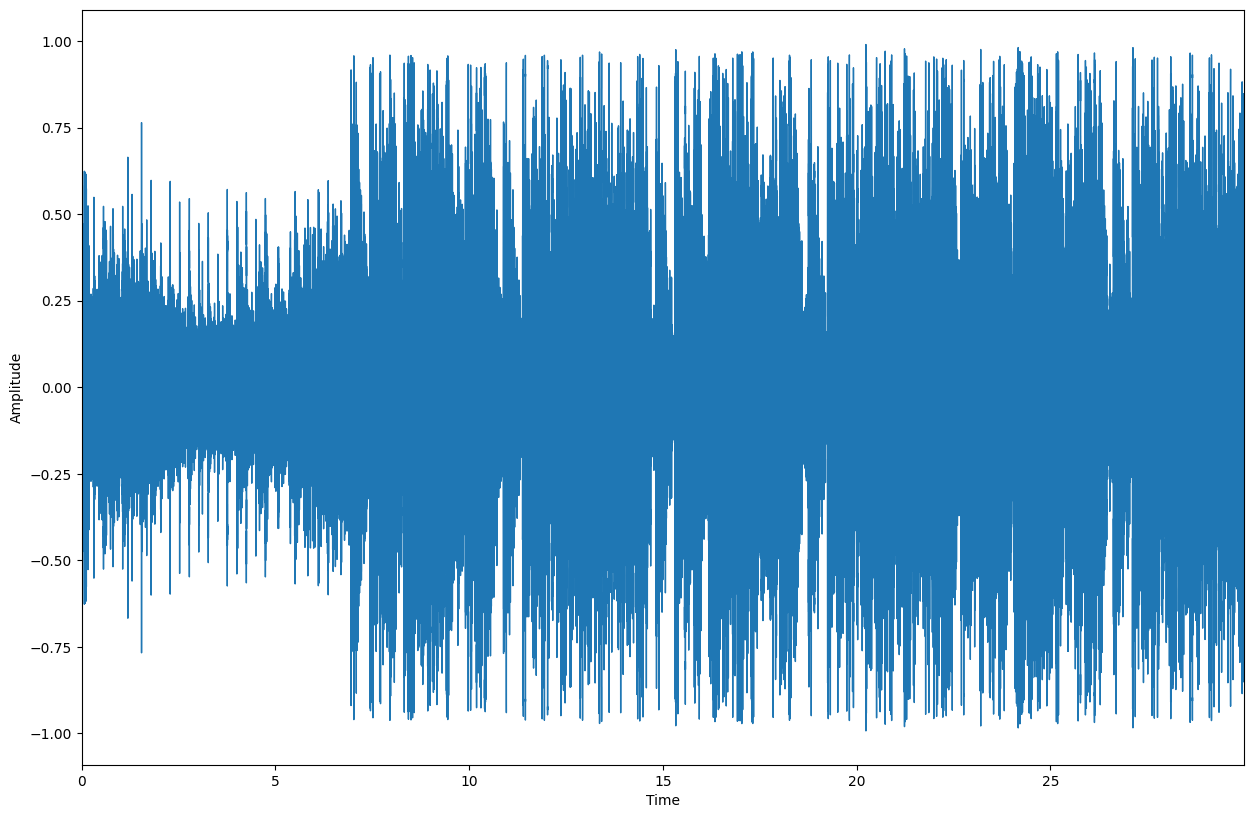

In [5]:
plt.figure(figsize=(15, 10), dpi=100)
librosa.display.waveplot(signal, sr=sr)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

## Moving into the frequency domain: FFT

In [6]:
fft = np.fft.fft(signal, n=n_samples)

In [7]:
print(type(fft))
print(fft.dtype)
print(fft.shape)
print(fft[1])

<class 'numpy.ndarray'>
complex128
(661500,)
(54.52838209530799-26.43722668631019j)


In [8]:
# Magnitude of complex frequency domain
fft_mag = np.abs(fft)

In [9]:
print(type(fft_mag))
print(fft_mag.dtype)
print(fft_mag.shape)
print(fft_mag[1])

<class 'numpy.ndarray'>
float64
(661500,)
60.59926904505743


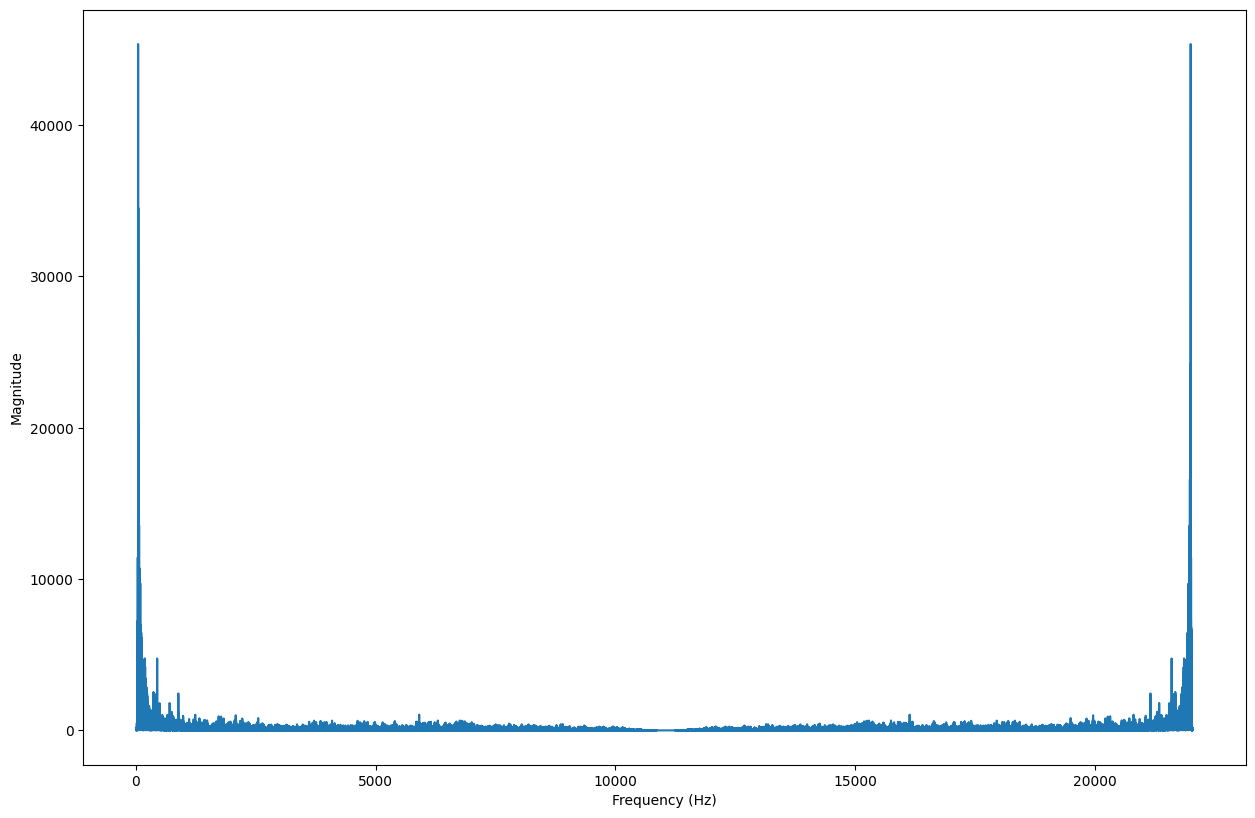

In [10]:
# Let's plot the power spectrum
frequency = np.linspace(0, sr, num=n_samples)

plt.figure(figsize=(15, 10), dpi=100)
plt.plot(frequency, fft_mag)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()
plt.close()

As we can observe, the power spectrum is symmetrical (recall Nyquist theorem).
We'll plot now the left half.

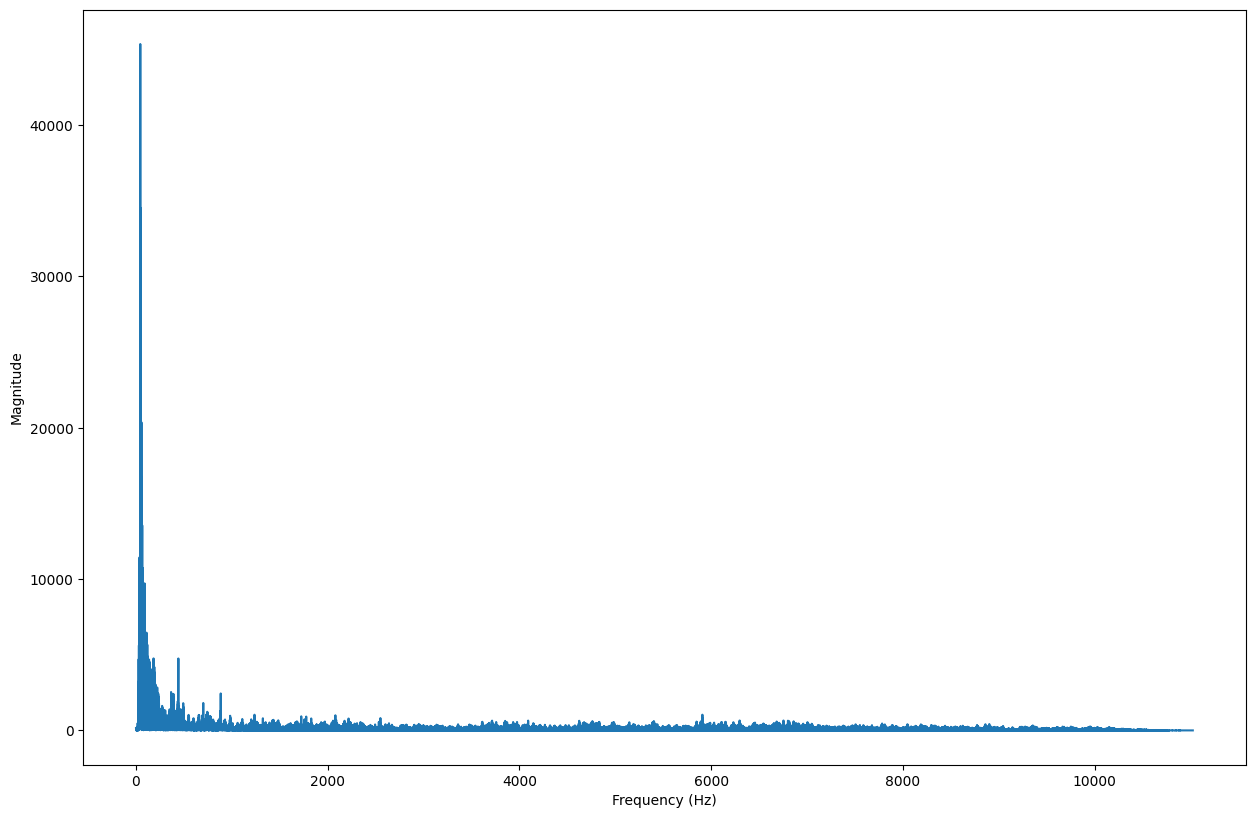

In [11]:
# Let's plot the power spectrum
left_frequency = frequency[:len(frequency) // 2]
left_magnitude = fft_mag[:len(fft_mag) // 2]

plt.figure(figsize=(15, 10), dpi=100)
plt.plot(left_frequency, left_magnitude)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

## Combining time and frequency: Short-Time Fourier Transform (STFT)

In [12]:
# We'll use librosa to compute the stft

n_fft = 2048        # number of samples to compute the FFT
hop_length = 512    # striding, number of samples between consecutive windows

stft = librosa.core.stft(signal, n_fft=n_fft, hop_length=hop_length)

In [13]:
print(type(stft))
print(stft.shape)
print(stft.dtype)

<class 'numpy.ndarray'>
(1025, 1292)
complex64


In [14]:
spectrogram = np.abs(stft)

Let's plot the power spectrogram with `librosa.display.specshow`

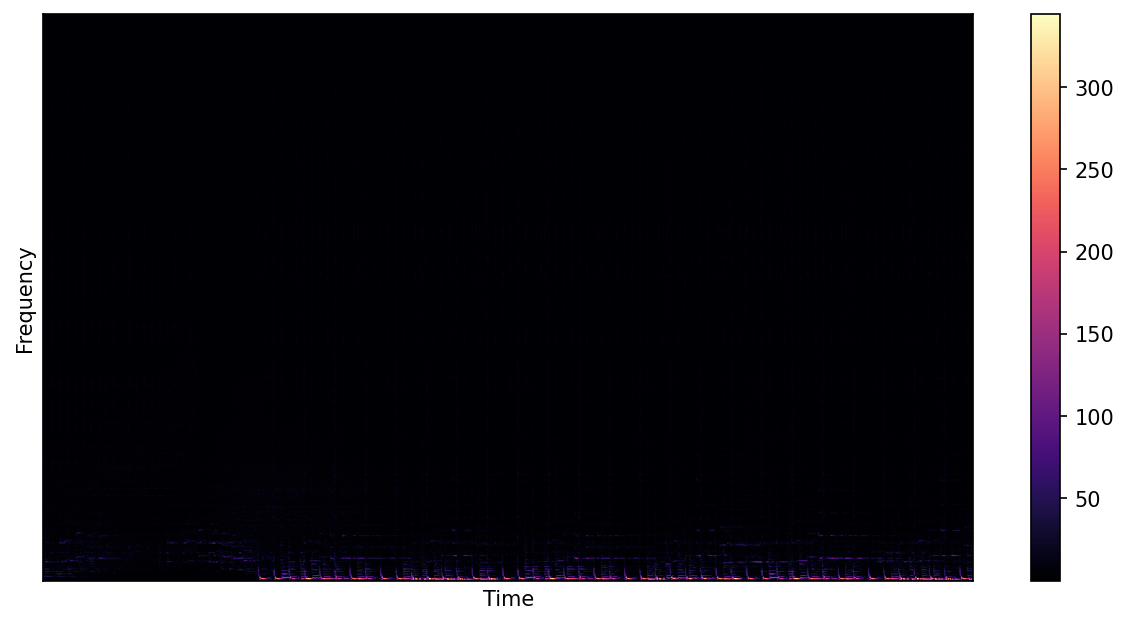

In [15]:
plt.figure(figsize=(10, 5), dpi=150)
librosa.display.specshow(spectrogram, sr=sr, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.show()

## A better visualization: Log Spectrogram

In [16]:
log_spectrogram = librosa.amplitude_to_db(spectrogram)

In [17]:
print(type(log_spectrogram))
print(log_spectrogram.shape)
print(log_spectrogram.dtype)

<class 'numpy.ndarray'>
(1025, 1292)
float32


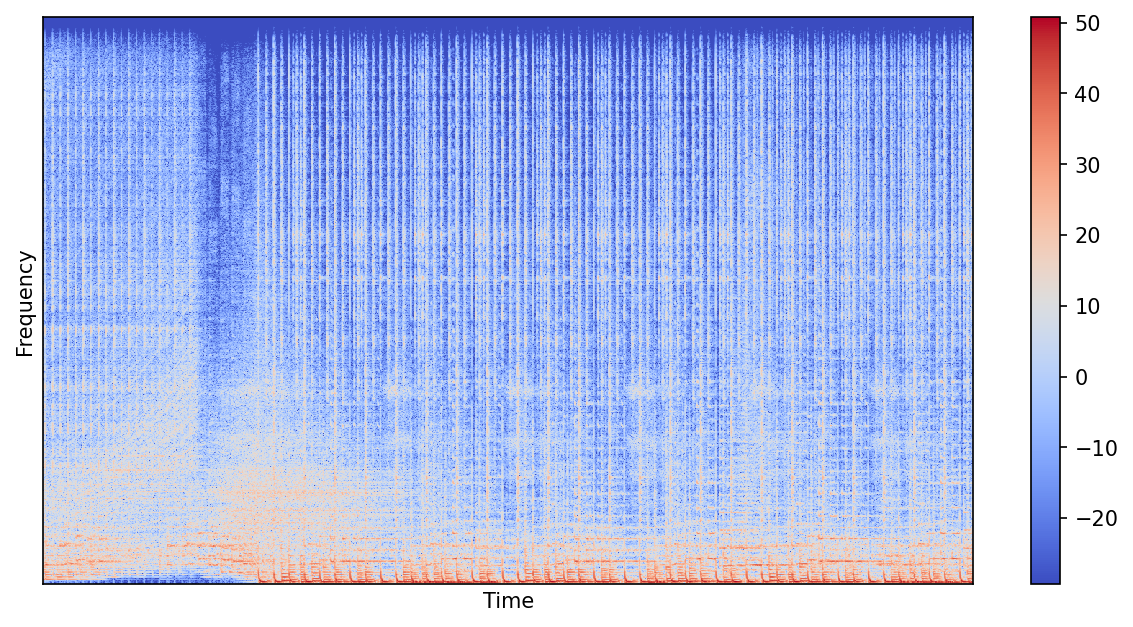

In [18]:
plt.figure(figsize=(10, 5), dpi=150)
librosa.display.specshow(log_spectrogram, sr=sr, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.show()

## Mel-frequency cepstrum coefficients: MFCCs

In [19]:
num_mfccs = 13  # common number of MFCCs for music
mfccs = librosa.feature.mfcc(signal, n_mfcc=num_mfccs, n_fft=n_fft, hop_length=hop_length)

In [20]:
print(type(mfccs))
print(mfccs.shape)
print(mfccs.dtype)

<class 'numpy.ndarray'>
(13, 1292)
float64


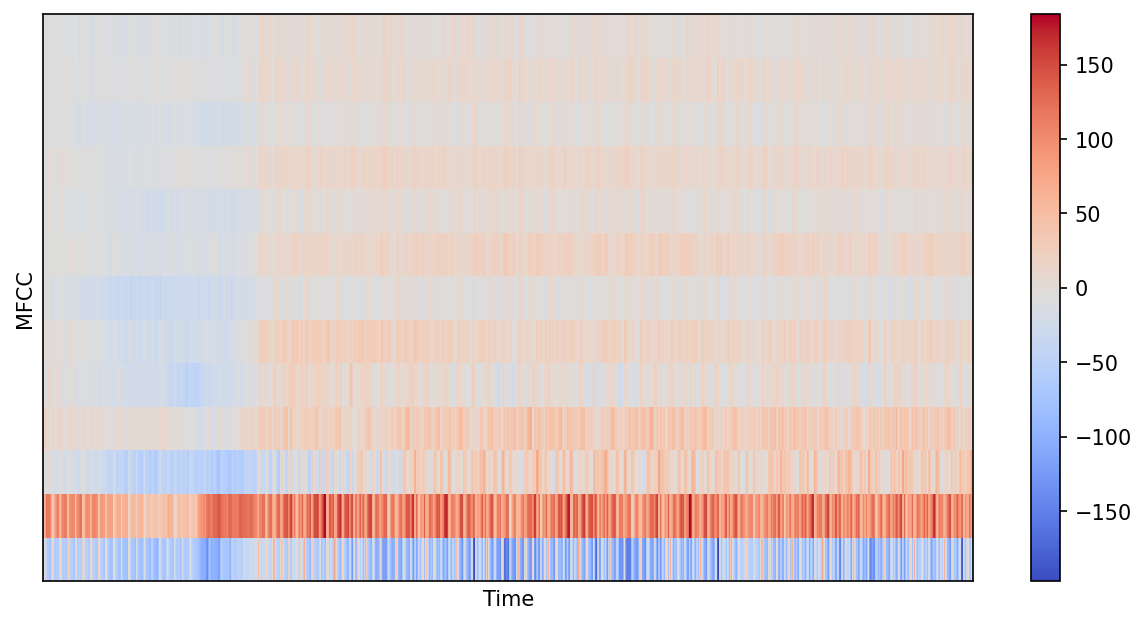

In [21]:
plt.figure(figsize=(10, 5), dpi=150)
librosa.display.specshow(mfccs, sr=sr, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC")
plt.colorbar()
plt.show()